<style>
h1{font-family: 'lucida handwriting'}
</style>
<center>

# **TP 1:** <br> Système d'infèrence floue
</center>

### **CHERGUI Moad**  
IID3

In [37]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#### Dans le cadre d’un système de logique floue pour estimer la vitesse de venyilateur, créez les variables floues suivantes :

#### 1. température avec les ensembles {froid, agréable, chaud}
#### 2. vitesse avec les ensembles {faible, moyenne, haute}

#### Utilisez des fonctions d’appartenance triangulaire.

In [38]:
# Créer les variables du problème
#ctrl.Antecedent(array of numbers, nom du variable)
temperature = ctrl.Antecedent(np.arange(10, 50, 1), 'temperature') #temperature est définie comme une variable d’entrée floue.
vitesse = ctrl.Consequent(np.arange(0, 100, 1), 'vitesse') #Antécédent correspond à une variable d’entrée pour le système flou.

# Créer des fonctions d'appartenance à l'aide de différents types
temperature['froid'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agréable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaud'] = fuzz.trimf(temperature.universe,[27, 50, 50])

vitesse['faible'] = fuzz.trimf(vitesse.universe, [0, 0, 40]) 
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['haute'] = fuzz.trimf(vitesse.universe, [60, 100, 100])


#### En vous basant sur les variables floues définies précédemment, affichez leurs fonctions d’appartenance à l’aide de la méthode view()

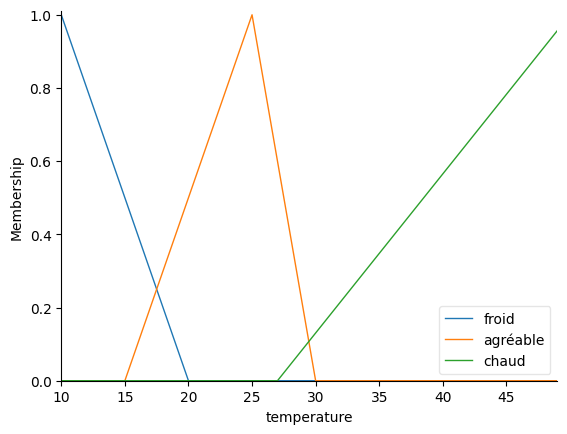

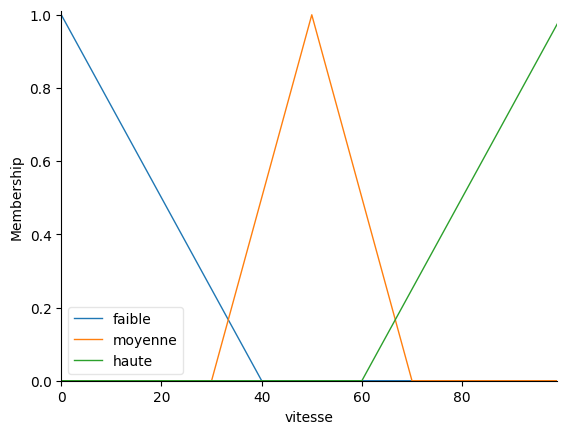

In [39]:
temperature.view()
vitesse.view() 

#### Écrivez les règles floues reliant la vitesse et la température dans le système de contrôle flou.

In [40]:
#definition des règles floues:
rule1 = ctrl.Rule(temperature['froid'], vitesse['faible'] )
rule2 = ctrl.Rule(temperature['agréable'], vitesse['moyenne'] )
rule3 = ctrl.Rule(temperature['chaud'], vitesse['haute'] )


#### En utilisant les règles floues définies précédemment, créez le système de contrôle flou et simulez son comportement pour une température de 18° pui de 28°.

#### Affichez ensuite ***la valeur de la vitesse de ventilateur calculée.***

**temperature = 18°**

In [49]:
#regrouper toutes les règles floues pour créer un système flou complet.
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# permet de donner des valeurs d’entrée réelles et de calculer la sortie correspondante.
vitesse_simulator= ctrl.ControlSystemSimulation(vitesse_ctrl)

#Saisie de valeur de température
vitesse_simulator.input['temperature'] = 18

#Résultat calculé
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

36.90548014077421


#### Visualisez, à l’aide de la méthode view(sim=...), les fonctions d’appartenance des variables floues pour illustrer la position des valeurs d’entrée et de sortie issues de la simulation.


 visualisation de μ(temperature=18°) et la vitesse de ventilateur calculée:


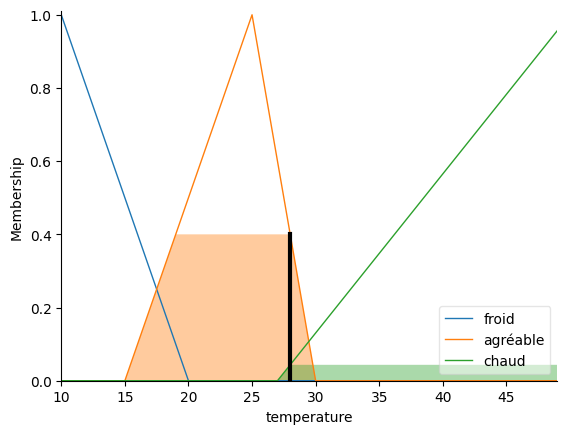

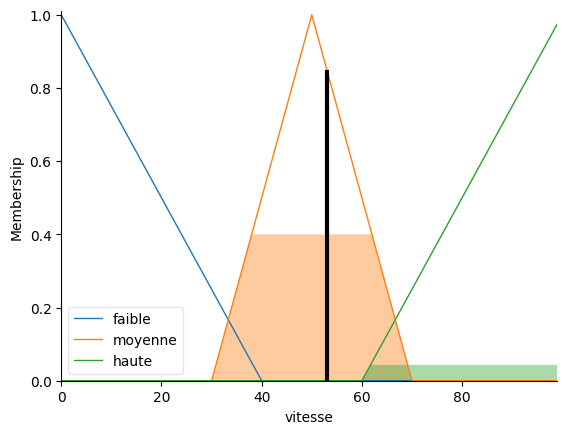

In [58]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
print("\n visualisation de μ(temperature=18°) et la vitesse de ventilateur calculée:")
temperature.view(sim=vitesse_simulator)
vitesse.view(sim=vitesse_simulator)


**temperature = 28°**

53.11927549655249

 visualisation μ(temperature=28°) et la vitesse de ventilateur calculée:


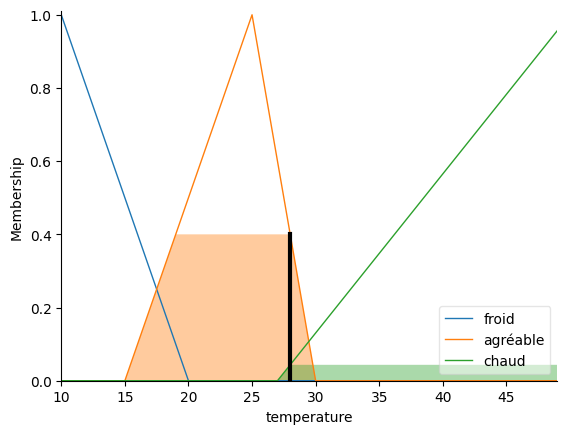

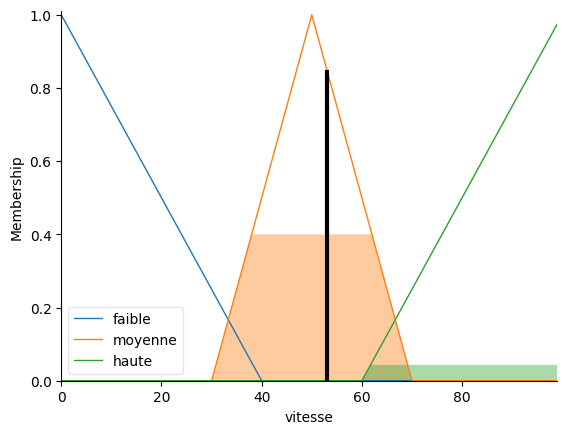

In [59]:
vitesse_simulator.input['temperature'] = 28

#Résultat calculé
vitesse_simulator.compute()
print(vitesse_simulator.output['vitesse'])

print("\n visualisation μ(temperature=28°) et la vitesse de ventilateur calculée:")
temperature.view(sim=vitesse_simulator)
vitesse.view(sim=vitesse_simulator)